In [10]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

In [11]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [12]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

# Support Vector Classifer

In [18]:
rng = np.random.default_rng(1)
rng

Generator(PCG64) at 0x7FA607B975A0

In [14]:
X = rng.standard_normal((50, 2))
X

array([[ 3.45584192e-01,  8.21618144e-01],
       [ 3.30437076e-01, -1.30315723e+00],
       [ 9.05355867e-01,  4.46374572e-01],
       [-5.36953235e-01,  5.81118104e-01],
       [ 3.64572396e-01,  2.94132497e-01],
       [ 2.84222413e-02,  5.46712987e-01],
       [-7.36454087e-01, -1.62909948e-01],
       [-4.82119313e-01,  5.98846213e-01],
       [ 3.97221075e-02, -2.92456751e-01],
       [-7.81908462e-01, -2.57192241e-01],
       [ 8.14218052e-03, -2.75602905e-01],
       [ 1.29406381e+00,  1.00672432e+00],
       [-2.71116248e+00, -1.88901325e+00],
       [-1.74772092e-01, -4.22190412e-01],
       [ 2.13642997e-01,  2.17321931e-01],
       [ 2.11783876e+00, -1.11202076e+00],
       [-3.77605007e-01,  2.04277161e+00],
       [ 6.46702996e-01,  6.63063372e-01],
       [-5.14006372e-01, -1.64807517e+00],
       [ 1.67464744e-01,  1.09014088e-01],
       [-1.22735205e+00, -6.83226662e-01],
       [-7.20436797e-02, -9.44751623e-01],
       [-9.82699679e-02,  9.54830275e-02],
       [ 3.

In [15]:
y = np.array([-1]*25+[1]*25)
y


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

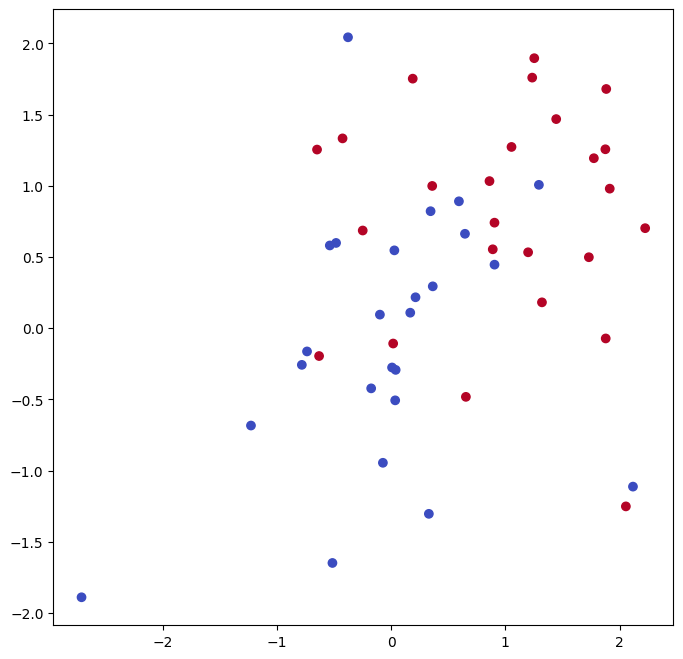

In [16]:
X[y == 1] += 1
fig, ax = subplots(figsize=(8, 8))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=cm.coolwarm)

In [17]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

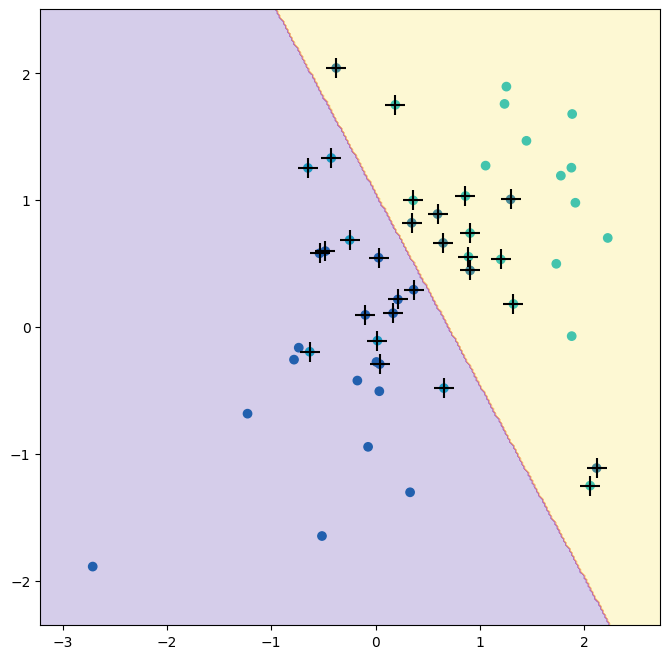

In [19]:
fig, ax = subplots(figsize=(8, 8))
plot_svm(X,
         y,
         svm_linear,
         ax=ax)


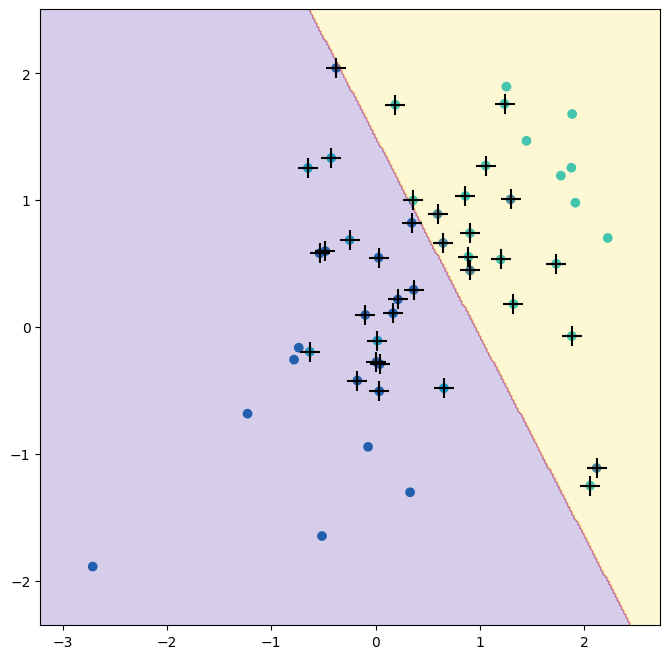

In [20]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8, 8))
plot_svm(X,
         y,
         svm_linear_small,
         ax=ax)


In [21]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [22]:
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [23]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

# Generate test dataset

In [ ]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test == 1] += 1
